In [ ]:
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io

In [ ]:
#imagelinks
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  

In [ ]:
#io is processing image library
image_plt=io.imread("https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg")

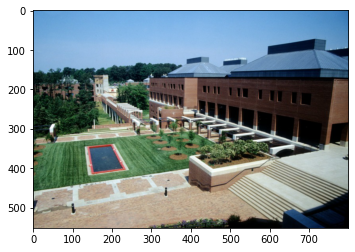

In [ ]:
#show the image with matplotlib
plt.imshow(image_plt)

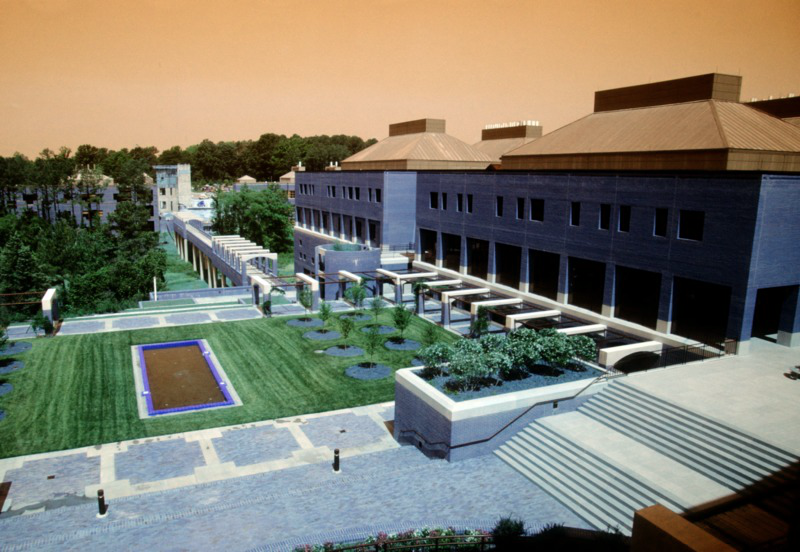

In [ ]:
#cv is computer vision to show the image as well with cusomized functions
cv2_imshow(image)

In [ ]:
#for loop to read the urls
for x in urls:
  print(x)
  print('------\n')


https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg
------

https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg
------

https://placekitten.com/800/571
------



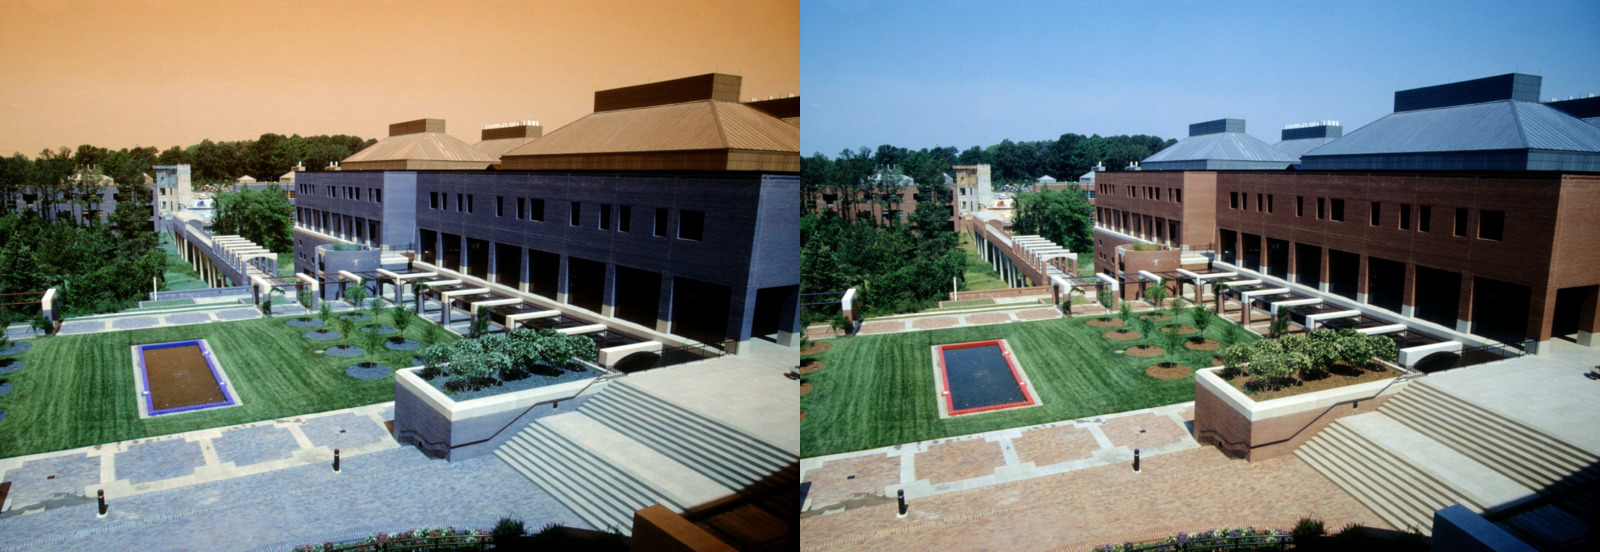

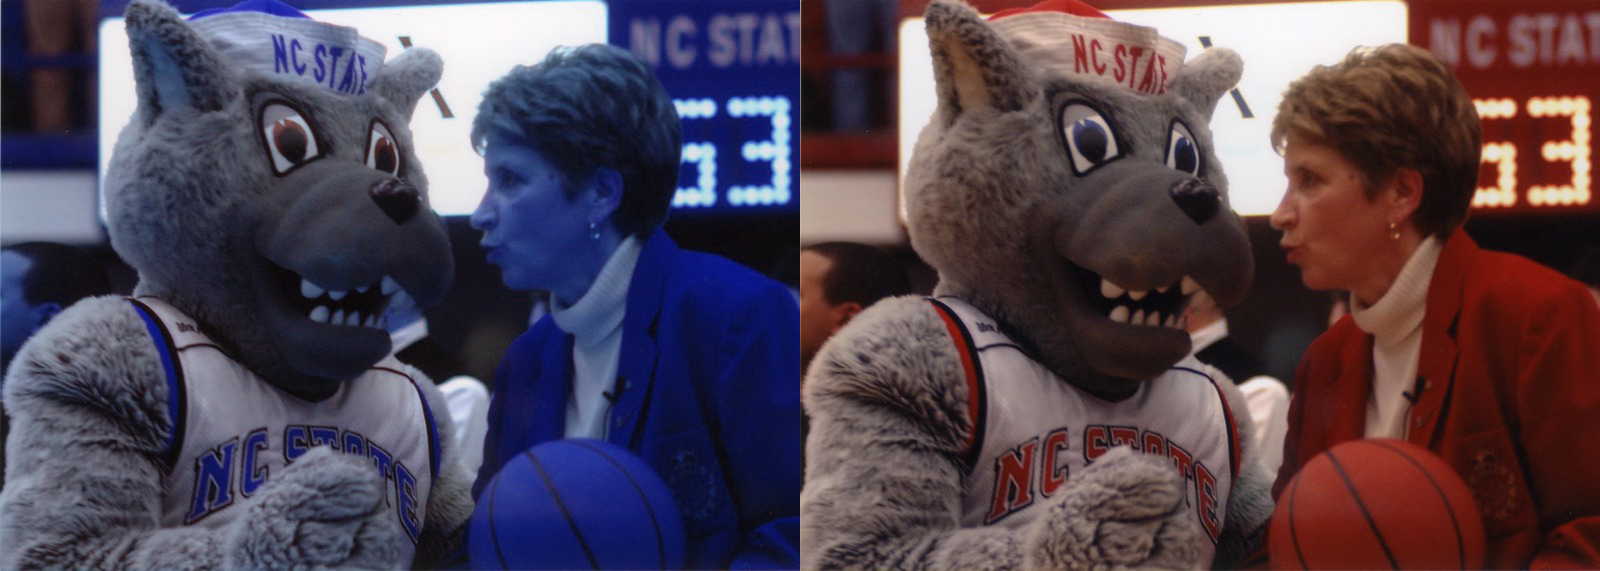

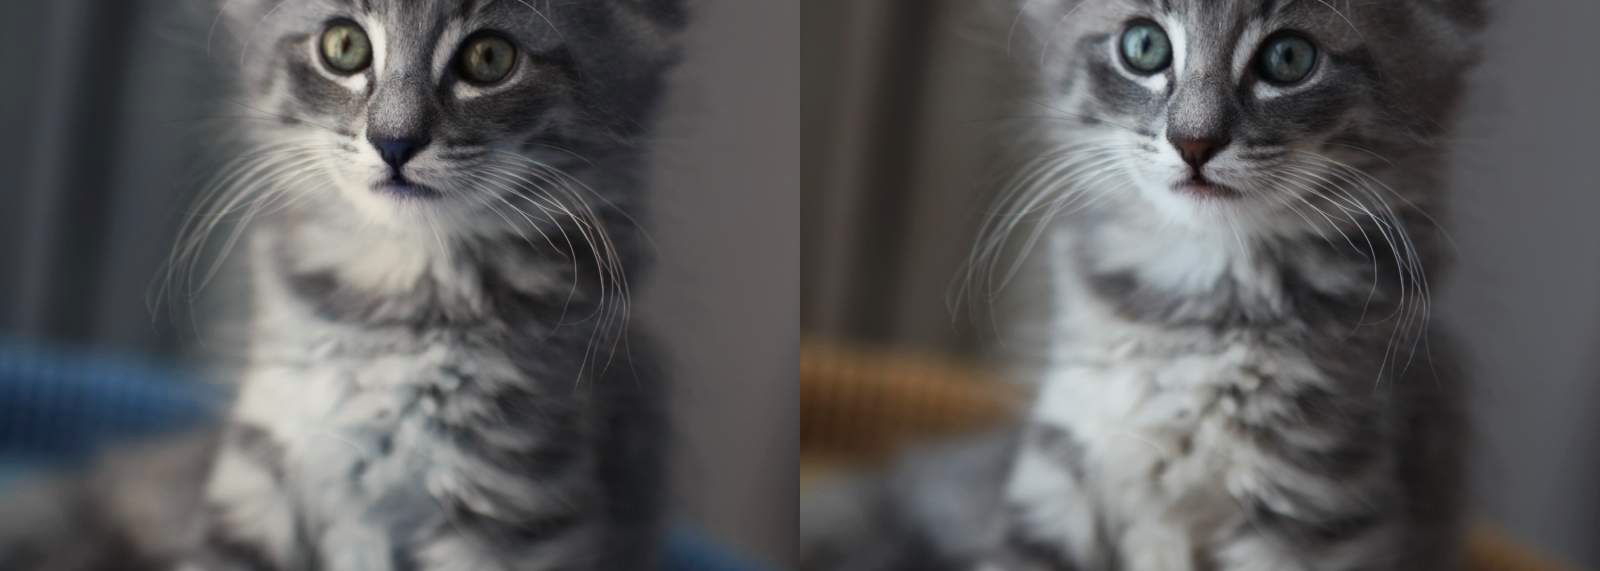

In [ ]:
for url in urls:
  ima= io.imread(url)
  ima2= cv.cvtColor(ima,cv.COLOR_BGR2RGB)
  final_frame= cv.hconcat((ima,ima2))
  cv2_imshow(final_frame)
  print('\n')


In [ ]:
from google.colab import files
f=files.upload()

Saving pil.png to pil.png


In [ ]:
image= Image.open(r"pil.png")

In [ ]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [ ]:
type(ima)

numpy.ndarray

In [ ]:
print(image.size)
print(image.format)
print(image.mode)



(1600, 552)
PNG
RGB


In [ ]:
#you can save and download the updated image in your format
image.save("marximu.jpg")
files.download("marximu.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#cropping the image

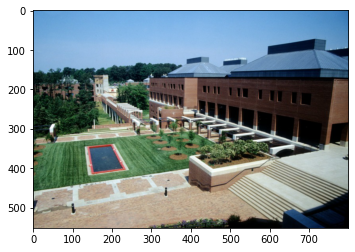

In [ ]:
plt.imshow(image_plt)

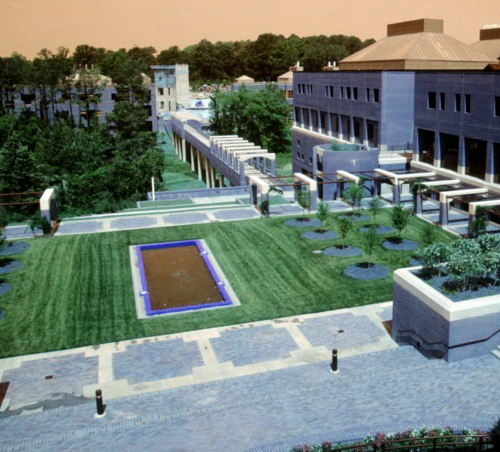

In [ ]:
#croping numpy array
crop_img = image_plt[100:100+500, 2:2+500]
cv2_imshow(crop_img)


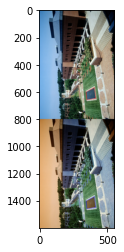

In [ ]:
#transposing the image
a= image.transpose(Image.ROTATE_90)
plt.imshow(a)
#plt.subplot(3,2,4)

## ETL processing


In [ ]:
# CONSTANT VALUES
OWNER = 'CSSEGISandData'
REPO = 'COVID-19'
PATH = 'csse_covid_19_data/csse_covid_19_daily_reports'
URL = f'https://api.github.com/repos/{OWNER}/{REPO}/contents/{PATH}'

In [ ]:
download_urls = []
response = requests.get(URL)
for data in tqdm(response.json()):
    if data['name'].endswith('.csv'):
        download_urls.append(data['download_url'])

In [ ]:
# List of labels to be renamed
relabel = {
    # 'Last Update': 'Last_Update',
    'Country/Region': 'Country_Region',
    'Lat': 'Latitude',
    'Long_': 'Longitude',
    'Province/State': 'Province_State',
}


def factor_dataframe(dat, filename):
    """ Refactor the dataframe to be uploaded into a SQL database
    as a pandas DataFrame
    """
    # rename labels
    for label in dat:
        if label in relabel:
            dat = dat.rename(columns = {label: relabel[label]})
    
    # return a dataframe with these parameters
    labels = ['Province_State', 'Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered']
    # filename is datetime
    if 'Last_Update' not in dat:
        dat['Last_Update'] = pd.to_datetime(filename)

    # replace columns not in dataframe with nan
    for label in labels:
        if label not in dat:
            dat[label] = np.nan

    return dat[labels]

In [ ]:
#load the data
def upload_to_sql(filenames, db_name, debug=False):
    """ Given a list of paths, upload to a database
    """
    conn = sqlite3.connect(f"{db_name}.db")
    
    if debug:
        print("Uploading into database")
    for i, file_path in tqdm(list(enumerate(filenames))):
        
        dat = pd.read_csv(file_path)

        # rename labels
        filename = os.path.basename(file_path).split('.')[0]
        dat = factor_dataframe(dat, filename)

        # write records to sql database
        if i == 0: # if first entry, and table name already exist, replace
            dat.to_sql(db_name, con=conn, index = False, if_exists='replace')
        else: # otherwise append to current table given db_name
            dat.to_sql(db_name, con=conn, index = False, if_exists='append')


# upload into sql database
upload_to_sql(download_urls, 'example', debug=True)